In [1]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt




In [2]:
matplotlib.rc('font', size=16)          # controls default text sizes
matplotlib.rc('axes', titlesize=16)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=16)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=14)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=14)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=16)    # legend fontsize
matplotlib.rc('figure', titlesize=16)  # fontsize of the figure title
matplotlib.rcParams['figure.dpi'] = 100
matplotlib.rc('figure.subplot', hspace=  0.4)

In [3]:
def create_template(traces):
    template = np.mean(traces, axis = 0)
    template_norm= template/np.linalg.norm(template)
    return template

7.322
7.336
-12356.440380830114


<ipython-input-18-237428e60e8d>:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


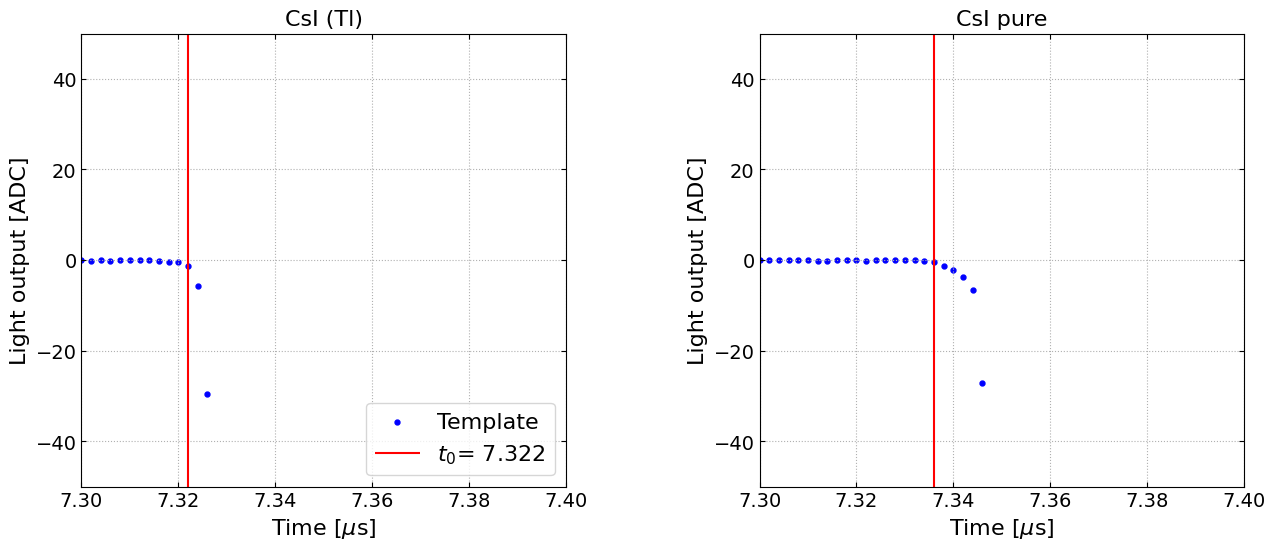

In [18]:
template_Tl = create_template(np.load('templates/Tl_template_pulses.npy'))
template_p = create_template(np.load('templates/pure_template_pulses.npy'))

indxTl =[i for i, x in enumerate(template_Tl) if x-np.mean(template_Tl[:1500]) < -4.1]
t0_Tl = (indxTl[0]-1)*2e-3
print (t0_Tl)
indxp =[i for i, x in enumerate(template_p) if x-np.mean(template_p[:1500]) < -1]
t0_p = (indxp[0]-1)*2e-3
print (t0_p)


fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15, 6), gridspec_kw={'wspace': 0.4})
ax1.scatter(np.arange(15000)*2e-3, template_Tl, label='Template', color='blue', marker = '.' ,s=50)
ax1.vlines(t0_Tl, -1600, 50, color ='red', label = "$t_0$= %s"%t0_Tl)
ax1.set_ylim(-50,50)
ax1.set_xlim(7.3,7.4)
ax1.set_ylabel(r"Light output [ADC]",fontsize = 16)
ax1.set_xlabel(r"Time [$\mu$s]",fontsize = 16)
ax1.set_title(r"CsI (Tl)",fontsize = 16)
lgd = ax1.legend(loc="lower right",fontsize = 16)
ax1.tick_params(which="both", direction="in", right=True, top=True)
ax1.grid(linestyle="dotted")



ax2.scatter(np.arange(15000)*2e-3, template_p, label='Template', color='blue', marker = '.' ,s=50)
ax2.vlines(t0_p, -1600, 50, color ='red', label = "$t_0$= %s"%t0_p)
ax2.set_ylim(-50,50)
ax2.set_xlim(7.3,7.4)
ax2.set_ylabel(r"Light output [ADC]",fontsize = 16)
ax2.set_xlabel(r"Time [$\mu$s]",fontsize = 16)
ax2.set_title(r"CsI pure",fontsize = 16)
# lgd = ax2.legend(loc="upper right",fontsize = 16)
ax2.tick_params(which="both", direction="in", right=True, top=True)
ax2.grid(linestyle="dotted")
fig.tight_layout()
print(min(template_p)/0.25)